# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> For this project, I selected the TMDb movie dataset from kaggle. According to kaggle, the data includes information on 10.000 movies.

I am interested in finding out which characterics make up a high rated movie on the hand and a high profit movie on the other hand. In conclusion I would also like to relate high profit and rating and see if those are correlated to each other.

**Characteristics of a popular movie**

*Columns of relevance*

Dependent Variable: vote_average

Independent Variables:

Budget,
Runtime,
Cast,
Director,
Genres,
Production Companies

Questions:

1. What budget is associated with the 100 best rated movies?
2. What runtime is associated with the 100 best rated movies on average?
3. What casts, directors, keywords, genres and production companies are associated with the 100 best rated movies?

**Charateristics of a high profit movie**

*Colomns of relevance*

Dependent variable: profit (revenue - budget)

Independent Variables:

Budget,
Runtime,
Cast,
Director,
Genres,
Production Companies,

Questions:
1. What budget level is associated with the 100 most high profit movies?
2. What runtime level is associated with the 100 most high profit movies?
3. What casts, directors, keywords, genres and production companies are associated with the 100 most high profit movies?

**Final question:**

Is there a significant correlation between vote average and revenue? Budget and revenue or budget and vote average? 


In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Set Overview

> In this section I am going to look at the data chosen in general in order to decide about further steps linked to the Data Cleaning process.

### General Properties

In [359]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [360]:
# Before making further changes to the data set, I would like to fixate the number of movies(rows) and features(columns)
df.shape 

(10866, 21)

In [361]:
# Moreover I would like to check for the amount of outliers and weird data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that there are a lot of zero values in the data set, which are linked to the characteristics we would like to investigate. These are vote_average, budget, revenue, runtime.

In [362]:
# Also we would like to see the amount of null values in the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can see that there are a lot of null values, but mostly in the columns that are not interesting for us.

Further we will clean the data set based on the findings above and adapt it to the questions of interest.

Our Plan is to
- drop the columns that are not of interest
- fill in missing values if any left
- get rid of duplicates
- take care of the columns of interest (budget, runtime, vote_average, revenue)

### Data Cleaning & Adaption to Questions to be answered

In [363]:
#drop columns that we are not going to use
df.drop(['homepage','tagline','overview','keywords','release_date', 'budget_adj', 'revenue_adj'],axis=1, inplace=True)

In [364]:
#fix null values with filling them up with the mean
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [365]:
#check for duplicates
sum(df.duplicated())

1

In [368]:
#drop duplicates and check how the data shape changes
df.drop_duplicates(inplace = True)
print("After removing duplicate values (rows,columns) : ",df.shape)

After removing duplicate values (rows,columns) :  (10865, 14)


In the next step we are going to clean the data for the columns of interest in order to get more reliable results in the end.

In [370]:
#giving list of column names that needs to be checked
check_row = ['runtime','budget', 'revenue', 'vote_average']

#this will replace the value of '0' to NaN of columns given in the list
df[check_row] = df[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
df.dropna(subset = check_row, inplace = True)

rows, col = df.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


In [371]:
#In order to investigate profit, we will have to create a new column which will hold the profit values of each movie

#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
df.insert(2, 'profit', df['revenue'] - df['budget'])

#we change the data type to int
df['profit'] = df['profit'].apply(np.int64)

#showing the dataset
df.head(2)

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,tt0369610,1363528810,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,tt1392190,228436354,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015


<a id='eda'></a>
## Characteristics of a popular movie

1. What budget is associated with the 100 best rated movies?
2. What runtime is associated with the 100 best rated movies?
3. What casts, directors, keywords, genres and production companies are associated with the 100 best rated movies? 

In [372]:
# In order to prepare for the further analysis, we select the top 100 popular movies.

# fisrt sort it by release year ascending and popularity descending
df_top_p = df.sort_values(['vote_average'], ascending=[False])
#group by year and choose the top 100 high
df_top_p = df_top_p.groupby('vote_average').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high popularity to low
df_top_p.head(5)

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,278,tt0111161,3341469,7.192039,25000000.0,28341469.0,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994
1,24128,tt0088178,3778922,0.283191,1200000.0,4978922.0,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88.0,Documentary|Music,Talking Heads|Arnold Stiefel Company,23,8.4,1984
2,238,tt0068646,239066411,5.738034,6000000.0,245066411.0,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175.0,Drama|Crime,Paramount Pictures|Alfran Productions,3970,8.3,1972
3,244786,tt2582802,10693093,4.780419,3300000.0,13993093.0,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105.0,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.2,2014
4,13,tt0109830,622945399,6.715966,55000000.0,677945399.0,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142.0,Comedy|Drama|Romance,Paramount Pictures,4856,8.1,1994


**What budget is associated with the 100 best rated movies?**

In [379]:
#in order to have clearer results we will devide the budget into budget levels

# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to devide the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [380]:
# use cut_into_quantile function to build a level column
df = cut_into_quantile(df_top_p,'budget')
df.head(1)

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_levels
0,278,tt0111161,3341469,7.192039,25000000.0,28341469.0,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,Moderately High


In [381]:
# Find the mean and median vote average of each level with groupby
result_mean = df_top_p.groupby('budget_levels')['vote_average'].mean()
result_mean

budget_levels
Low                6.262979
Medium             6.119420
Moderately High    6.070158
High               6.148699
Name: vote_average, dtype: float64

In [382]:
result_median = df_top_p.groupby('budget_levels')['vote_average'].median()
result_median

budget_levels
Low                6.4
Medium             6.2
Moderately High    6.1
High               6.1
Name: vote_average, dtype: float64

In [383]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

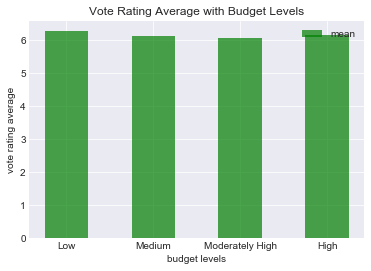

In [424]:
# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='g', alpha=0.7, label='mean')

# title and labels
plt.ylabel('vote rating average')
plt.xlabel('budget levels')
plt.title('Vote Rating Average with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

From the histogram we can see that the top 100 best rated movies are not associeted with a specific amount of budget, as all the bars are approximately of the same height. This means that a good rated movie is rather independent of budget.

**What runtime is associated with the 100 best rated movies?**

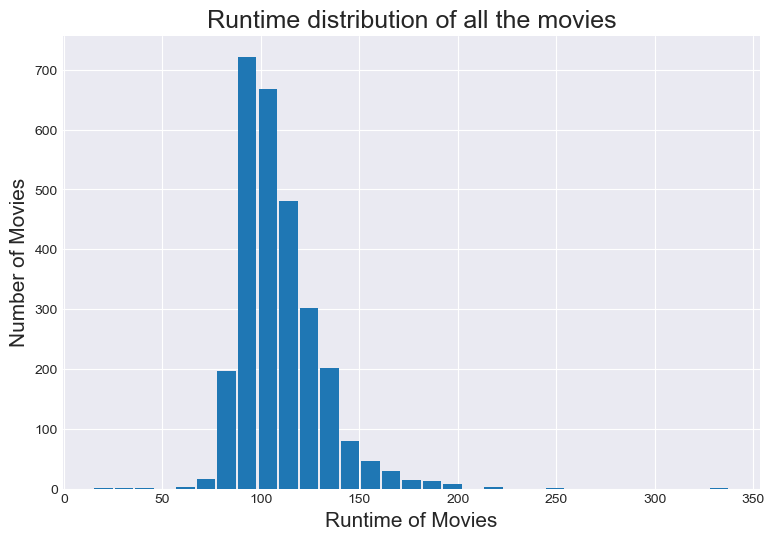

In [387]:
#plotting a histogram of runtime of top 100 movies

#gives styles to bg plot
sns.set_style('darkgrid')

#changing the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(df_top_p['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

In [391]:
df_top_p.runtime.median()

105.0

From the histogram and our calculation we can see that the 100 best rated movies have an average of approx. 90-110 min runtime. We can see that most of them lie around this value, which means that this might be a good predictor of vote average rating.

**What casts, directors, keywords, genres and production companies are associated with the 100 best rated movies?**

In [392]:
df_top_p.head(2)

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_levels
0,278,tt0111161,3341469,7.192039,25000000.0,28341469.0,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,Moderately High
1,24128,tt0088178,3778922,0.283191,1200000.0,4978922.0,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88.0,Documentary|Music,Talking Heads|Arnold Stiefel Company,23,8.4,1984,Low


In [393]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

In [394]:
# find top three cast
a = find_top(df_top_p.cast)
# find top three director
b = find_top(df_top_p.director)
# find top three genres
c = find_top(df_top_p.genres)
# find top three production companies
d = find_top(df_top_p.production_companies)

In [395]:
#Use the result above to create a summary dataframe.
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_genres': c.index, 'popular_producer': d.index})
df_popular

,popular_cast,popular_director,popular_genres,popular_producer
0,Robert De Niro,Steven Spielberg,Drama,Warner Bros.
1,Nicolas Cage,Clint Eastwood,Comedy,Universal Pictures
2,Samuel L. Jackson,Ridley Scott,Thriller,Paramount Pictures


Here we can see the top three actors, directors, genres and producers that are associated with the 100 best rated movies by count.

<a id='eda'></a>
## Charateristics of a high profit movie

1. What budget level is associated with the 100 most high profit movies?
2. What runtime level is associated with the 100 most high profit movies?
3. What casts, directors, keywords, genres and production companies are associated with the 100 most high profit movies?

In [403]:
# Select Top 100 profitable movies.
# fisrt sort it by profit
df_top_pr = df.sort_values(['profit'],ascending=[False])
#group by profit and choose the top 100 high
df_top_pr = df_top_pr.groupby('profit').head(100).reset_index(drop=True)
df_top_pr.head(5)

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_levels
0,19995,tt0499549,2544505847,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,High
1,140607,tt2488496,1868178225,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,High
2,597,tt0120338,1645034188,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,High
3,168259,tt2820852,1316249360,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,High
4,24428,tt0848228,1299557910,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012,High


**What budget level is associated with the 100 most high profit movies?**

In [404]:
# use cut_into_quantile function to build a level column
df = cut_into_quantile(df_top_pr,'budget')
df.head(1)

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_levels
0,19995,tt0499549,2544505847,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,High


In [405]:
# Find the mean and median popularity of each level with groupby
result_mean_pr = df_top_pr.groupby('budget_levels')['popularity'].mean()
result_mean_pr

budget_levels
Low                0.720963
Medium             0.947432
Moderately High    1.147434
High               2.106897
Name: popularity, dtype: float64

In [406]:
result_median_pr = df_top_pr.groupby('budget_levels')['popularity'].median()
result_median_pr

budget_levels
Low                0.506902
Medium             0.651917
Moderately High    0.875630
High               1.453443
Name: popularity, dtype: float64

In [407]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

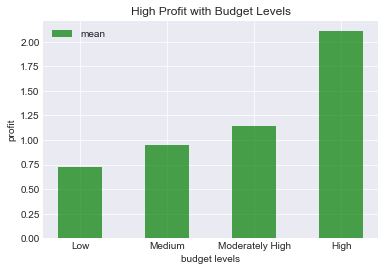

In [408]:
# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean_pr, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('profit')
plt.xlabel('budget levels')
plt.title('High Profit with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median_pr.index  
plt.xticks(locations, labels)
# legend
plt.legend()

We can see that the 100 most high profit movies are associeted with high budget. This could mean that high profit might be linked to high budget.

**What runtime level is associated with the 100 most high profit movies?**

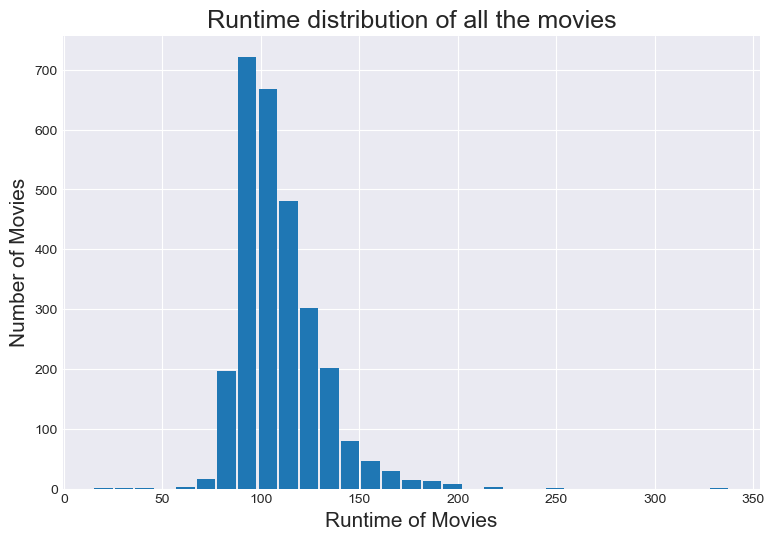

In [411]:
#plotting a histogram of runtime of top 100 high profit movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(df_top_pr['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

In [410]:
df_top_pr['runtime'].mean()

109.29849137931035

We can see that the average runtime for high profit movies is quite similar to the 100 best rated movies. It also lies between 90 and 110 min. This means that runtime seems to be a good, but maybe not quite influential predictor for rating and profit.


**What casts, directors, keywords, genres and production companies are associated with the 100 most high profit movies?**

In [412]:
df_top_pr.head()

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_levels
0,19995,tt0499549,2544505847,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,High
1,140607,tt2488496,1868178225,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,High
2,597,tt0120338,1645034188,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,High
3,168259,tt2820852,1316249360,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,High
4,24428,tt0848228,1299557910,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012,High


In [413]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

In [414]:
# find top three cast
e = find_top(df_top_pr.cast)
# find top three director
f = find_top(df_top_pr.director)
# find top three genres
g = find_top(df_top_pr.genres)
# find top three production companies
h = find_top(df_top_pr.production_companies)

In [415]:
#Use the result above to create a summary dataframe.
df_profit = pd.DataFrame({'profit_cast': e.index, 'profit_director': f.index, 'profit_genres': g.index, 'profit_producer': h.index})
df_profit

,profit_cast,profit_director,profit_genres,profit_producer
0,Robert De Niro,Steven Spielberg,Drama,Warner Bros.
1,Nicolas Cage,Clint Eastwood,Comedy,Universal Pictures
2,Samuel L. Jackson,Martin Scorsese,Thriller,Paramount Pictures


The top cast, director, genre and producer by count associated with the 100 most profitable movies is the same as for the 100 best rated movies. We could hypothesize a link between profit and rating therefore, though it is not quite clear what is influencing what.

## Final Questions

**Is there a correlation between vote average and profit?**

Text(0.5,1,'Correlation between vote average and profit')

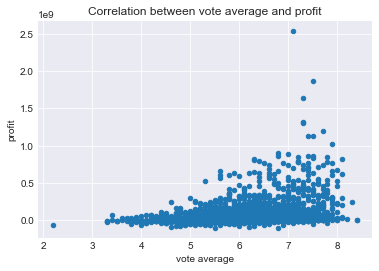

In [423]:
df.plot(x='vote_average', y='profit', kind='scatter')

# title and labels
plt.ylabel('profit')
plt.xlabel('vote average')
plt.title('Correlation between vote average and profit')

We can see that there indeed seems to be a trend that the higher the vote_average is, the higher the profit will be. Though this might need further research in order to prove this to be true.

**Is there a correlation between budget and profit?**

Text(0.5,1,'Correlation between budget and profit')

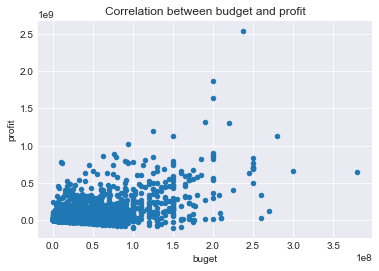

In [421]:
df.plot(x='budget', y='profit', kind='scatter')

# title and labels
plt.ylabel('profit')
plt.xlabel('buget')
plt.title('Correlation between budget and profit')

Also in terms of budget and profit, we can see that there seems to be a correlation that the more budget was spent on a movie, the more profit it accumulates. We could see this also in the histogram above when answering another question.

**Is there a correlation between budget and vote average?**

Text(0.5,1,'Correlation between vote average and budget')

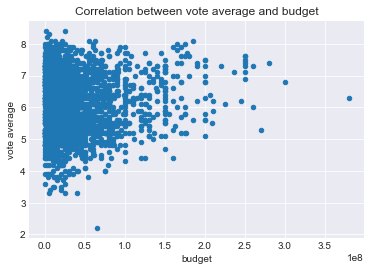

In [422]:
df.plot(x='budget', y='vote_average', kind='scatter')

# title and labels
plt.ylabel('vote average')
plt.xlabel('budget')
plt.title('Correlation between vote average and budget')

In comparison to the results above, this correlation seems to be rather weak, meaning that the popularity of a movie does not really depend on the budget spent.

<a id='conclusions'></a>
## Conclusions

1. Vote Average Rating seems to be independent of budget spent.
2. On the other hand, Profit seems to be linked to budget.
3. The runtime distribution for best rated and most profitable movies seems to show a distribution of runtime in general. This means that runtime is not really influencing rating or profit.
4. There might be a correlation between profit and vote average, but this would need further analysis.